In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/school-enrolment-in-india-by-age-gender-201320/enrolment_age_2018_19.csv
/kaggle/input/school-enrolment-in-india-by-age-gender-201320/enrolment_age_2016_17.csv
/kaggle/input/school-enrolment-in-india-by-age-gender-201320/enrolment_age_2015_16.csv
/kaggle/input/school-enrolment-in-india-by-age-gender-201320/enrolment_age_2019_20.csv
/kaggle/input/school-enrolment-in-india-by-age-gender-201320/enrolment_age_2014_15.csv
/kaggle/input/school-enrolment-in-india-by-age-gender-201320/enrolment_age_2013_14.csv
/kaggle/input/school-enrolment-in-india-by-age-gender-201320/enrolment_age_2017_18.csv


**The dataset has School Enrolment in India by age & gender.
It covers classes 1 to 12
It covers data for each state and union territory in India
It covers all districts in the states and union territories. Please note that the number of states and union territories as well as districts has changed over these 7 years, so the data may not be fully consistent across years.**

In [2]:
# Let's analyse data of year 2019 - 2020

df_20 = pd.read_csv('/kaggle/input/school-enrolment-in-india-by-age-gender-201320/enrolment_age_2019_20.csv')
df_19 = pd.read_csv('/kaggle/input/school-enrolment-in-india-by-age-gender-201320/enrolment_age_2018_19.csv')
df_18 = pd.read_csv('/kaggle/input/school-enrolment-in-india-by-age-gender-201320/enrolment_age_2017_18.csv')

In [3]:
df_20.head(10)

,ac_year,age,state_cd,state_name,district_cd,district_name,class_1_boys,class_2_boys,class_3_boys,class_4_boys,...,class_3_girls,class_4_girls,class_5_girls,class_6_girls,class_7_girls,class_8_girls,class_9_girls,class_10_girls,class_11_girls,class_12_girls
0,2019-20,4,1,Jammu & Kashmir,101,KUPWARA,2195,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019-20,4,1,Jammu & Kashmir,102,BARAMULA,1077,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2019-20,4,1,Jammu & Kashmir,103,SRINAGAR,439,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019-20,4,1,Jammu & Kashmir,104,BADGAM,1768,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019-20,4,1,Jammu & Kashmir,105,PULWAMA,1149,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2019-20,4,1,Jammu & Kashmir,106,ANANTNAG,1037,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2019-20,4,1,Jammu & Kashmir,109,DODA,308,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2019-20,4,1,Jammu & Kashmir,110,UDHAMPUR,166,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2019-20,4,1,Jammu & Kashmir,111,PUNCH,1114,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2019-20,4,1,Jammu & Kashmir,112,RAJAURI,1324,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Get info about the data
df_20.info

<bound method DataFrame.info of        ac_year  age  state_cd       state_name  district_cd district_name  \
0      2019-20    4         1  Jammu & Kashmir          101       KUPWARA   
1      2019-20    4         1  Jammu & Kashmir          102      BARAMULA   
2      2019-20    4         1  Jammu & Kashmir          103      SRINAGAR   
3      2019-20    4         1  Jammu & Kashmir          104        BADGAM   
4      2019-20    4         1  Jammu & Kashmir          105       PULWAMA   
...        ...  ...       ...              ...          ...           ...   
14655  2019-20   23        36        Telangana         3631       KHAMMAM   
14656  2019-20   23        36        Telangana         3632        MULUGU   
14657  2019-20   23        36        Telangana         3633   NARAYANAPET   
14658  2019-20   23        37           Ladakh         3707  LEH (LADAKH)   
14659  2019-20   23        37           Ladakh         3708        KARGIL   

       class_1_boys  class_2_boys  class_3_

**It can be infered from the info that most values under class_x_girls or class_x_boys are zero. Let's count the number of values that are zero in each column.**

**Here x is value 1 to 12*

In [5]:
#checking number of zero values for each category
df_20.eq(0).sum()

ac_year              0
age                  0
state_cd             0
state_name           0
district_cd          0
district_name        0
class_1_boys      8729
class_2_boys      8669
class_3_boys      8564
class_4_boys      8570
class_5_boys      8566
class_6_boys      8558
class_7_boys      8566
class_8_boys      8578
class_9_boys      8584
class_10_boys     8170
class_11_boys     8458
class_12_boys     8850
class_1_girls     8827
class_2_girls     8775
class_3_girls     8661
class_4_girls     8628
class_5_girls     8642
class_6_girls     8608
class_7_girls     8589
class_8_girls     8615
class_9_girls     8609
class_10_girls    8277
class_11_girls    8452
class_12_girls    8838
dtype: int64

*Around 8k zero values are available in the dataset, Hence we can try to remove or ignore them in the analysis.*


In [6]:
#Removes all rows with all values = 0 , but our dataset does not have such rows
#df_20 = df_20.loc[~(df_20==0).all(axis=1)]

In [7]:
#class_1_boys_per_state = df_20.groupby(['state_cd'])['class_1_boys'].sum()

#Combiing state data by summing via district names and their values for boys attendig 1st grade
#state_for_num = df_20.groupby(['state_cd'])


# Each state has been provided with a specific state code (state_cd) whicxh is further divided in districts_name and district_cd .

**A bar graph has been plotted below to depict few of these states along with codes.**

<AxesSubplot:xlabel='state_cd', ylabel='state_name'>

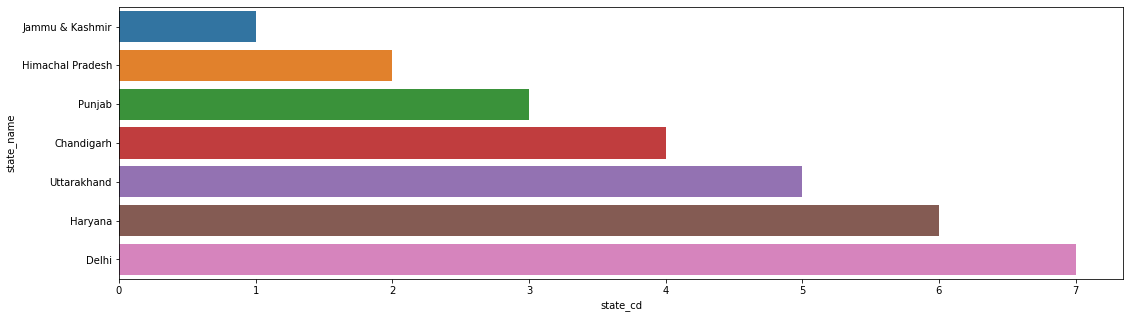

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (18,5))
sns.barplot(x = 'state_cd', y= 'state_name', data = df_18.head(100))

**A similar bar plot is plotted as above but with state name and state codes as parameters.**

<AxesSubplot:xlabel='district_name', ylabel='district_cd'>

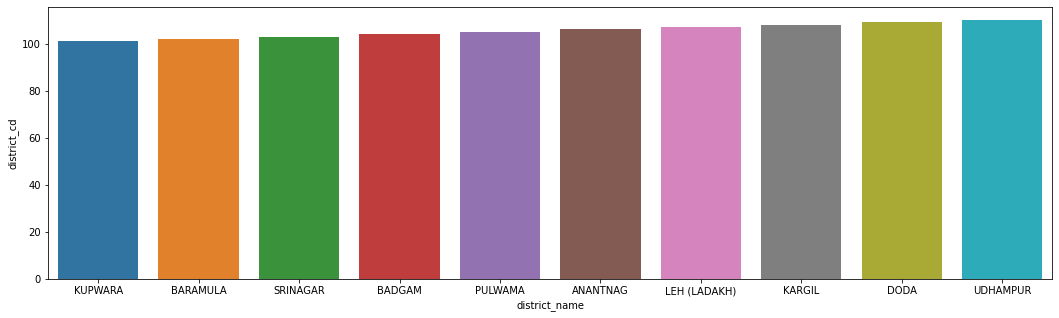

In [9]:
plt.figure(figsize = (18,5))
sns.barplot(x = 'district_name', y= 'district_cd', data = df_18.head(10))


**Let's plot in the state names in a pie chart.**

*As you can see Utar Pradesh which is the largest state contributes maximum values in the pie chart as well as in the bar plot below, means the number of data points will be maximum for Utar Pradesh.*

<AxesSubplot:ylabel='state_name'>

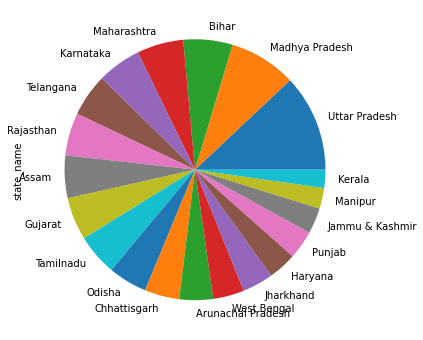

In [10]:
df_20['state_name'].value_counts().head(20).plot(kind = 'pie', figsize = (6,6))

Text(0.5, 0, 'Number of states')

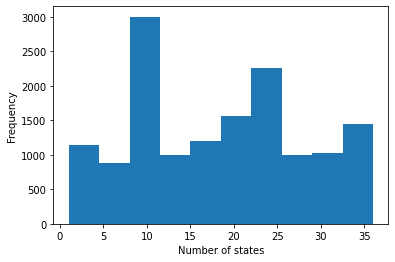

In [11]:
df_19.state_cd.plot(kind = 'hist')
plt.xlabel('Number of states')

**A similar pie chart can be plotted for depicting age of students which tends to be of range 5 to 22.**

<AxesSubplot:ylabel='age'>

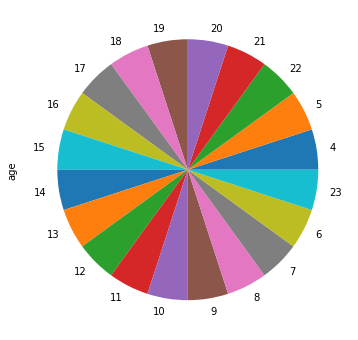

In [12]:
df_20['age'].value_counts().plot(kind = 'pie', figsize = (6,6))

# Now checkout the Number of boys attending class 1 in 2019 and later we'll make a comparision between the same data from 2018, 2019 and 2020 dataset.

Text(0.5, 0, 'Number of boys attending class 1 in 2019')

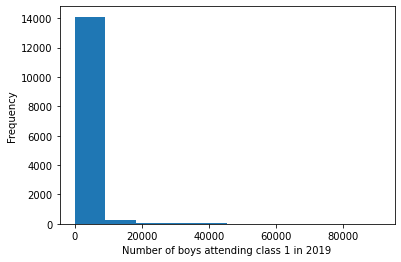

In [13]:
df_19.class_1_boys.plot(kind = 'hist')
plt.xlabel('Number of boys attending class 1 in 2019')

In [14]:
#df2 = pd.DataFrame(df_20, columns=["class_1_boys", "class_1_girls"])
#df_20.plot.bar(x = "class_1_boys", y = "class_1_girls",stacked=True)


<AxesSubplot:>

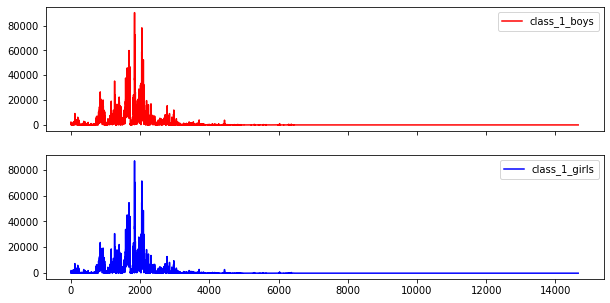

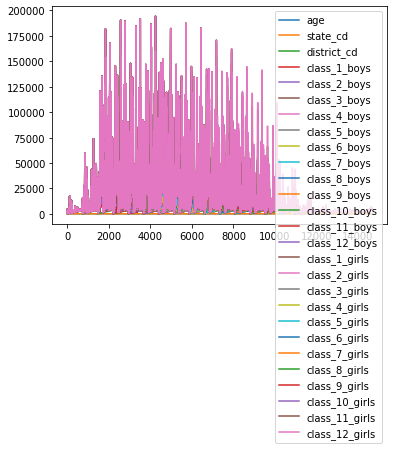

In [15]:
#comparision of number of boys and girls who attended class 1 in 2020
df_20.plot(kind = 'line',subplots = True, y = ['class_1_boys', 'class_1_girls'], figsize = (10, 5), color = ['red', 'blue'])
df_20.plot.line(stacked = True)

<AxesSubplot:>

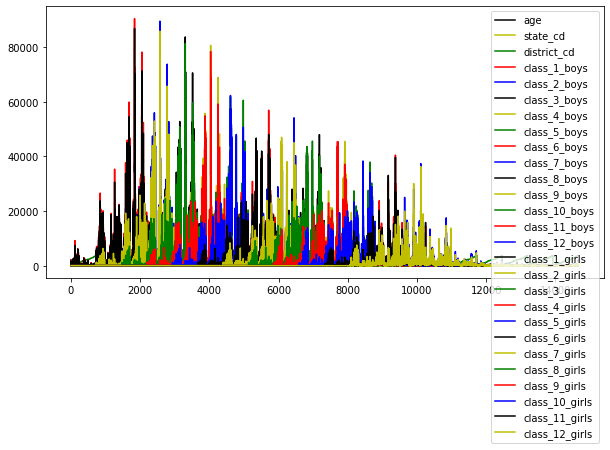

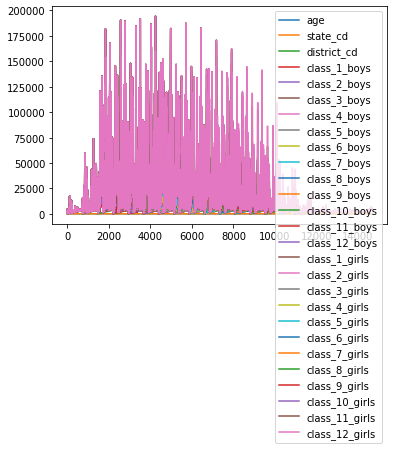

In [16]:
# Plotting Data for year 2020

# Adding colors of my choice
from itertools import cycle, islice
my_colors = list(islice(cycle(['k', 'y', 'g', 'r', 'b']), None, len(df_20)))

#defining plot
df_20.plot(kind = 'line', figsize = (10, 5), color = my_colors)
df_20.plot.line(stacked = True)

<AxesSubplot:>

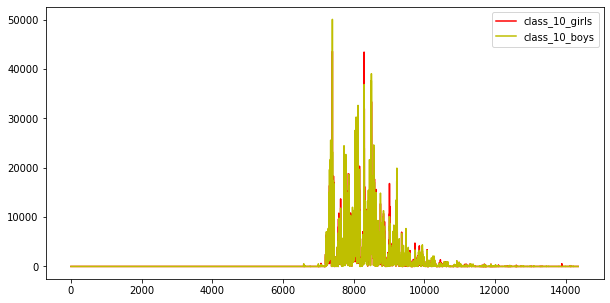

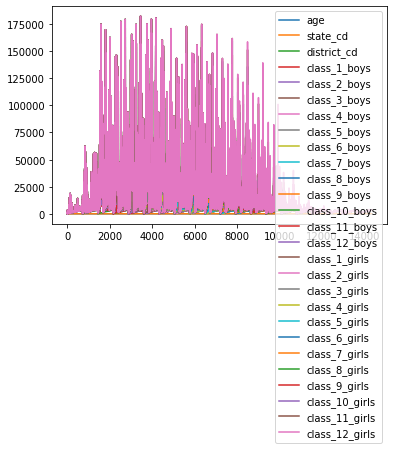

In [17]:
#comparision of number of boys vs number of girls who attended class_1 in 2018


df_18.plot(kind = 'line', y = ['class_10_girls','class_10_boys'], figsize = (10, 5), color =['r','y'])
df_18.plot.line(stacked = True)

While it is observed that many girls in India never made it to class 10, sometimes because of family pressure or some other reasons. But some parts of above data brings good news when the red line run over the yellow ones depicting more girl students enrolling in class 10 and above.

In [18]:
#Graph for comparision between number of boys vs number of girls in class 12 in year 2020.

#df_20.plot(x="state_cd", y=["class_10_boys", "class_10_girls"], kind="bar", figsize=(9, 8))
#plt.show()

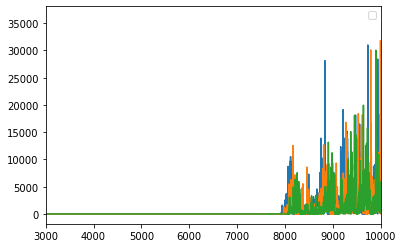

In [19]:
#Plotting Data for class_12_girls for 3 dataframes i.e year 2018, 2019 and 2020

fig = plt.figure()

for frame in [df_18 ,df_19, df_20]:
    #print(frame['class_1_boys'])
    plt.plot(frame['class_12_girls'])

plt.xlim(3000,10000)
#plt.ylim(0,3000)
plt.legend()
plt.show()


# Thank You for exploring this dataset with me.

**Please share your feedback and suggestions & help me improve.**